# Die Titanic


## L'analyse exploratoire des données(EDA)

## Part1: EDA
### 1. Analyse des fonctionnalités.

In [2]:
# Importation des bibliothèques adéquates.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Importation du jeux de données 
data=pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# vérification des valeurs nulles totales
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='grey'>Les champs  ``Âge``,``Cabine`` et ``Embarqué`` ont des valeurs nulles. Je vais essayer de les réparer.</font>

### Combien de survivants?

<font color='grey'>   Graphique en pourcentage des survivants et des morts avec matplotlib(``subplot``) et seaborne (``countplot``)   </font>

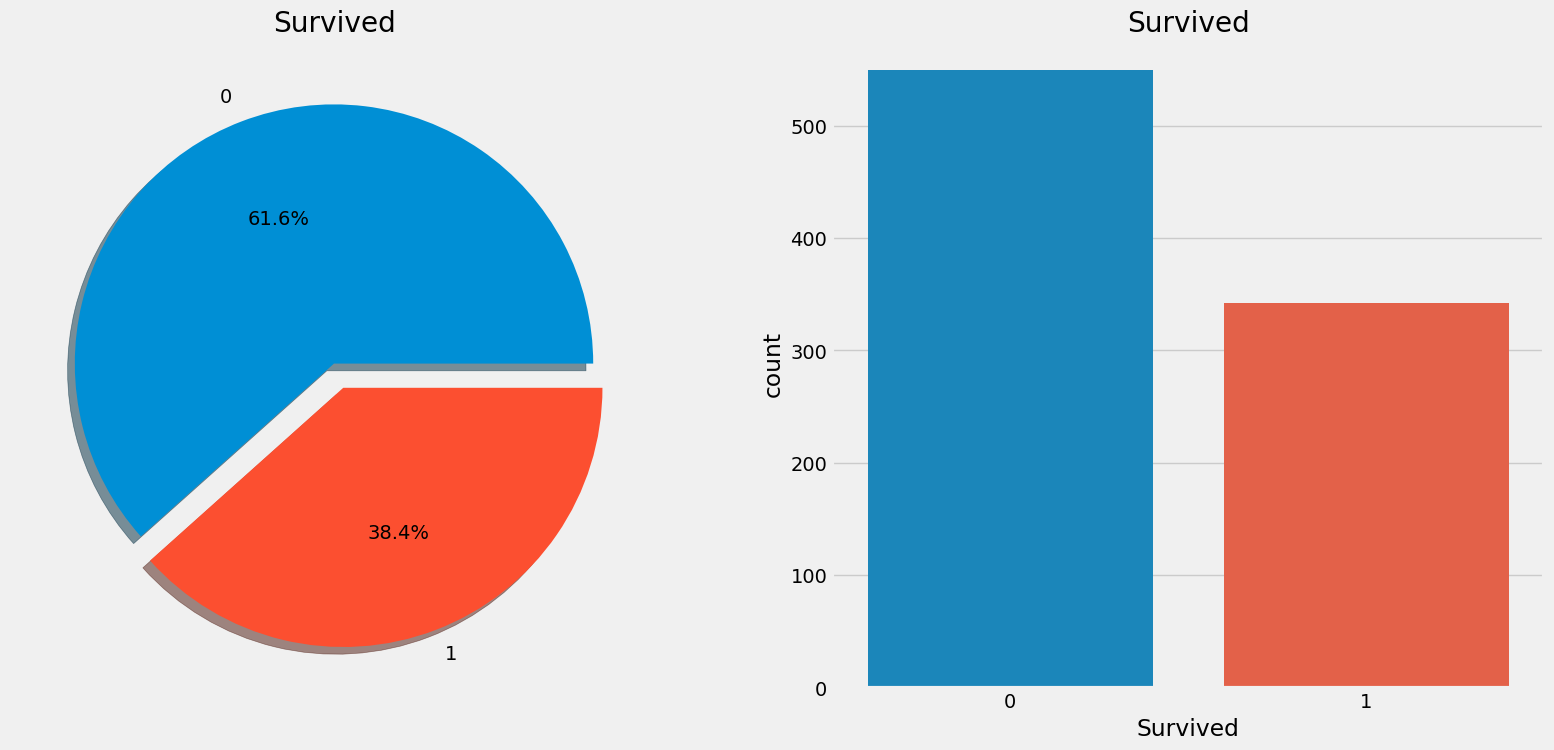

In [6]:
#données groupées des deux sex sur les mort et les survivants.
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<font color=grey> Il est évident que peu de passagers ont survécu à l'accident. 

Sur les ``891`` passagers de l'ensemble d'entraînement, seuls 350 ont survécu, soit seulement ``38,4 % `` .
 Nous devons creuser davantage pour obtenir un meilleur aperçu des données et voir quelles catégories de passagers ont survécu et lesquelles n'ont pas survécu.

Nous allons essayer de vérifier le taux de survie en utilisant ``les différentes caractéristiques`` de l'ensemble de données. Certaines de ces caractéristiques sont ``le sexe``, ``le port d'embarquement``, ``l'âge``, ``etc``.

Tout d'abord, comprenons les différents ``types de caractéristiques``.</font>

<font color='grey'> Commençons par comprendre les différents ``types de fonctionnalités``. </font>

## Analyser les fonctionnalités

## Sex--> Categorical Feature

In [8]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

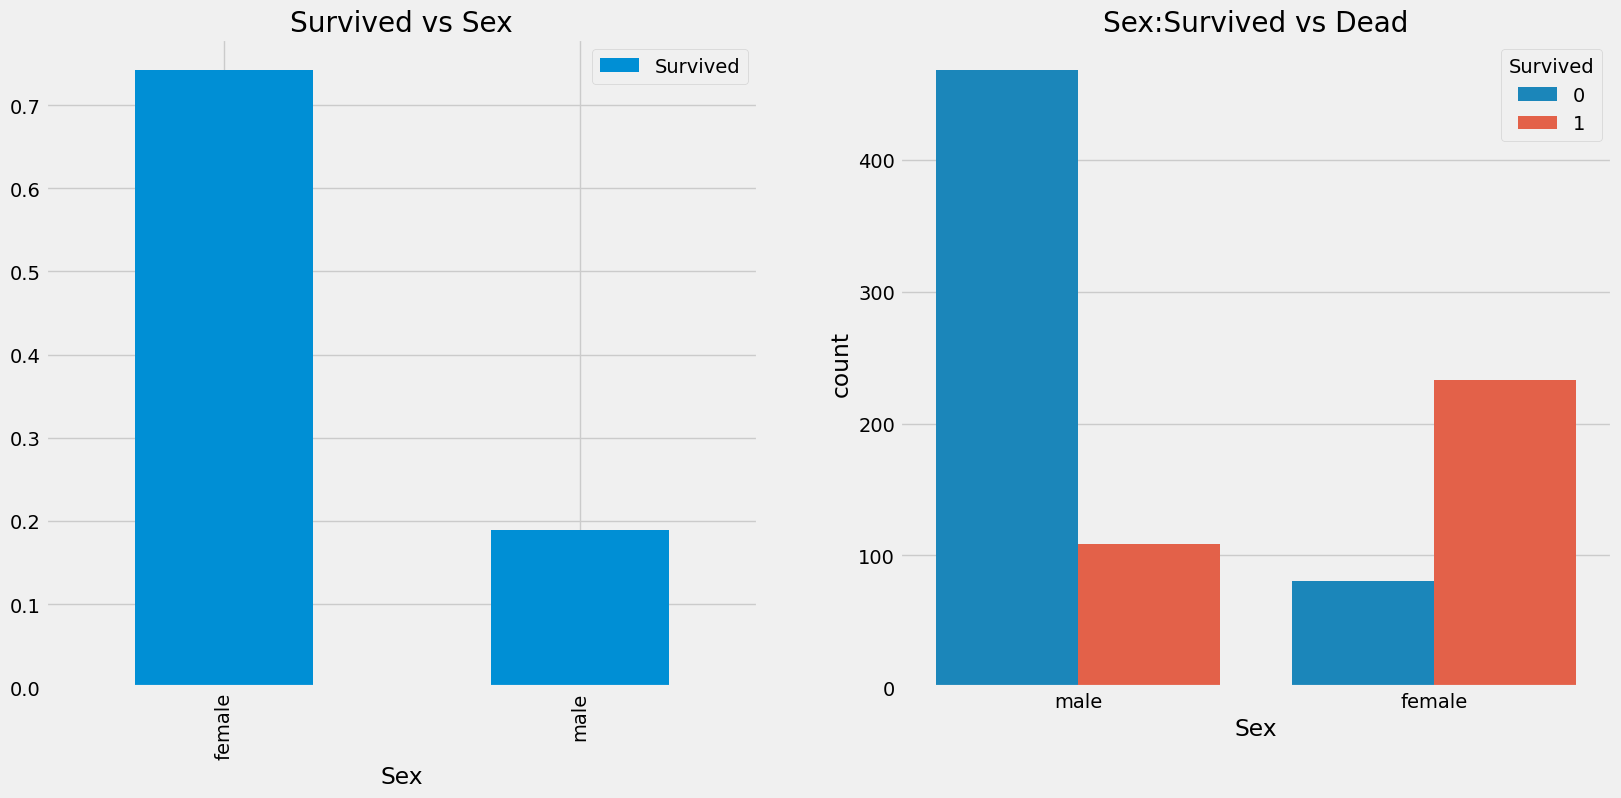

In [46]:
#graphique sur les données groupées par sexe sur les survivants avec subplots et comparaison entre les survivants et les mort avec countplot
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

<font color='grey'> Cela semble intéressant. Le nombre d'hommes sur le navire est bien supérieur au nombre de femmes. Pourtant, le nombre de femmes sauvées est presque le double du nombre d'hommes sauvés. Le taux de survie d'une **femme sur le navire est d'environ ``75 %``, tandis que celui des hommes est d'environ ``18-19 %``.** </font>

<font color='grey'> Cela semble être une fonctionnalité ``très importante`` pour la modélisation. Mais est-ce le meilleur? Vérifions d'autres fonctionnalités.

## Pclass --> Caractéristique ordinale

In [17]:
#tableau croisé par classe sur les survivants et les morts
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


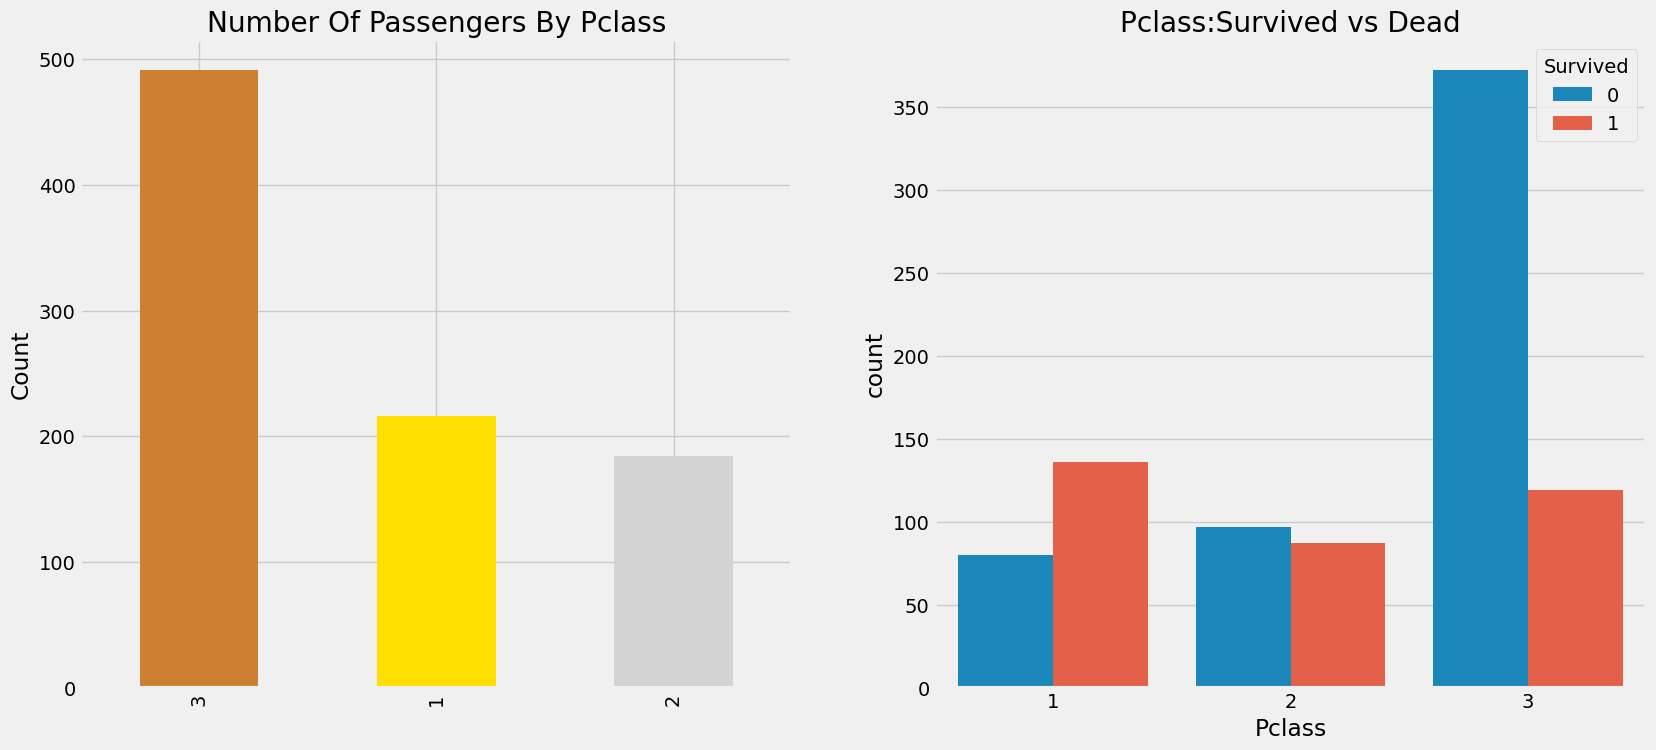

In [13]:
# graphique sur les données groupées par classe à bord avec 
# matplotlib( subplots) et countplot sur les morts et survivants par classe
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(data=data,x='Pclass',hue='Survived',ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

<font color='grey'>la classe 3 était beaucoup plus élevé, le nombre de survivants est très faible, environ ``25%``.

Pour la classe 1, le pourcentage de survie est d'environ ``63 %``, tandis que pour la classe 2, il est d'environ ``48 %``. Donc l'argent et le statut sont importants. C'est un monde tellement matérialiste.

Plongeons un peu plus loin et vérifions d'autres observations intéressantes. Vérifions le taux de survie avec ``sexe et classe P`` ensemble.</font>

In [10]:
#tableau croisé par classe et sex sur les survivants et les morts avec pandas(crosstab)
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

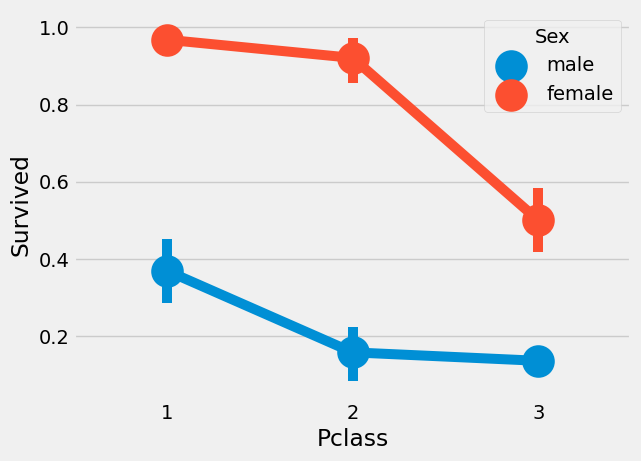

In [11]:
#graphique sur les survivants par sex et classe avec histplot
sns.pointplot(data=data,x='Pclass',y='Survived',hue='Sex')
plt.show()

`<font color='grey'>Nous utilisons ``pointPlot`` dans ce cas, car ils permettent de séparer facilement les valeurs catégorielles.

En regardant le ``Tableau croisé`` et le ``pointPlot``, nous pouvons facilement déduire que la survie des ``femmes de la classe P1`` est d'environ ``95-96%``, puisque seulement 3 des 94 femmes de la classe P1 sont décédées. 

Il est évident que, quelle que soit la classe P, les femmes sont prioritaires lors du sauvetage. Même les hommes de la classe P1 ont un taux de survie très bas.

Il semble que la classe P soit également une caractéristique importante. Analysons les autres caractéristiques.</font>

## Âge--> Caractéristique continue

In [24]:
# Données sur l'age minimum, moyen et maximum .
# caractéristique des differents ages
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


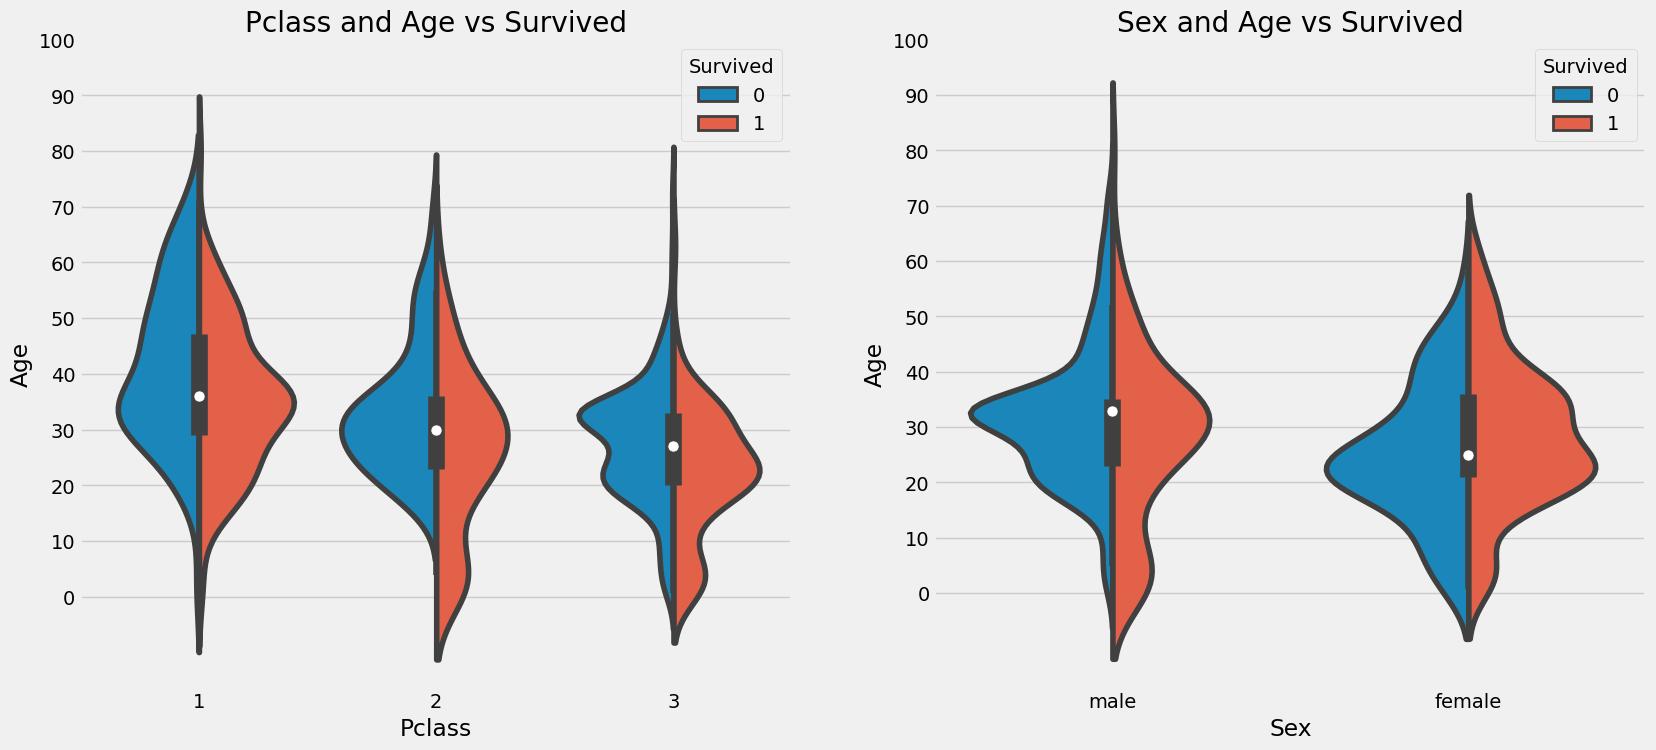

In [45]:
#graphique par class et age sur les survivants et les morts avec seaborn(violinplot)
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=data,x="Pclass",y="Age", hue="Survived",split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(data=data,x="Sex",y="Age", hue="Survived",split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### Observations :

<font color='grey'>1. Le nombre d'enfants augmente avec la classe P et le taux de survie des passagers de moins de 10 ans (c'est-à-dire les enfants) semble être bon quelle que soit la classe P.

2. Les chances de survie des passagers âgés de 20 à 50 ans de Pclass1 sont élevées et encore meilleures pour les femmes.

3. Pour les hommes, les chances de survie diminuent avec l'augmentation de l'âge.</font>

<font color='grey'>Comme nous l'avons vu précédemment, la fonctionnalité Age a **177** valeurs nulles. Pour remplacer ces valeurs NaN, nous pouvons leur attribuer l'âge moyen du jeu de données.

Mais le problème est qu'il y avait beaucoup de gens d'âges différents. Nous ne pouvons tout simplement pas attribuer un enfant de 4 ans dont l'âge moyen est de 29 ans. Existe-t-il un moyen de savoir dans quelle tranche d'âge se trouve le passager ? ?

**Bingo!!!!**, nous pouvons vérifier la fonctionnalité **Nom**. En regardant la caractéristique, nous pouvons voir que les noms ont une salutation comme Mr ou Mrs. Ainsi, nous pouvons attribuer les valeurs moyennes de Mr et Mrs aux groupes respectifs.</font>

**''Qu'y a-t-il dans un nom ??''**---> **Fonctionnalité** :p

extration des initiales du noms

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')
    

<font color='grey'>Bon, nous utilisons ici la Regex : ``[A-Za-z]+)\.`` Donc, ce qu'il fait, c'est qu'il recherche les chaînes comprises entre ``A-Z ou a-z`` et suivies d'un ``(point)``. Nous avons donc réussi à extraire les initiales du nom.</font>

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


<font color='grey'>D'accord, il y a des initiales mal orthographiées comme ``Mlle`` ou ``Mme`` qui signifient Miss. Je vais les remplacer par ``Miss`` et la même chose pour les autres valeurs.</font>

In [18]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [19]:
#données initiale groupées d'ages moyen par categorie
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [20]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [21]:
data.Age.isnull().any()

False

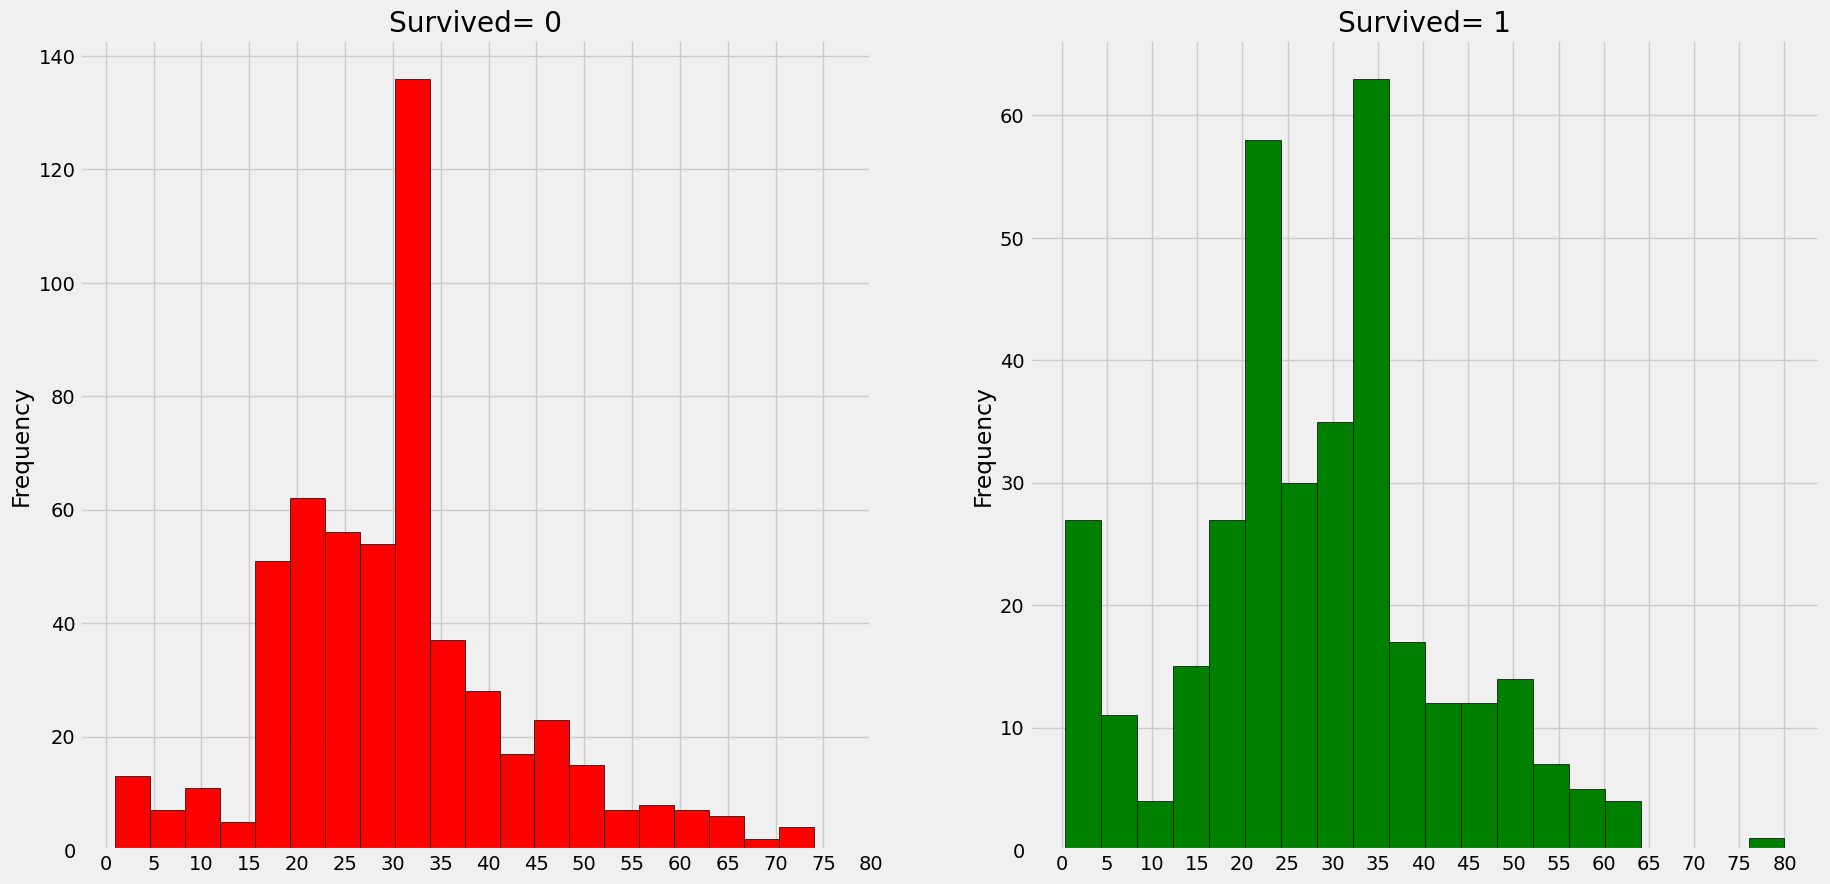

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations :

<font color='grey'>1. Les tout-petits (``âge <5``) ont été sauvés en grand nombre (``la politique des femmes et des enfants d'abord``).

2. Le passager le plus âgé à être sauver (``80 ans``).

3. Le nombre maximum de décès était dans le groupe d'âge de ``30`` à ``40`` ans.</font>

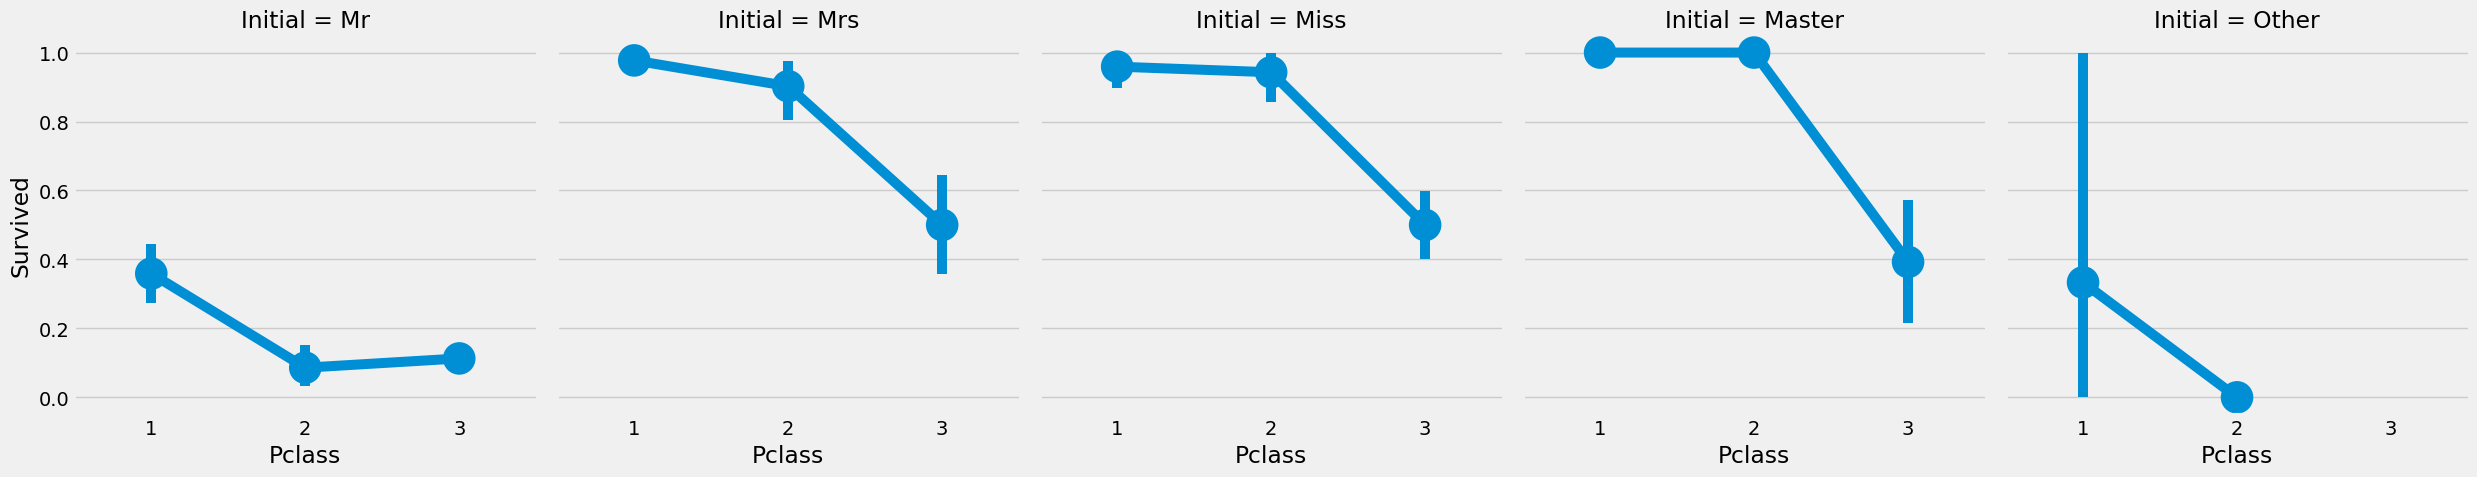

In [23]:
sns.catplot(data=data,x='Pclass',y='Survived',col='Initial',kind='point')
plt.show()

<font color='grey'>La politique de la femme et de l'enfant d'abord est donc valable quelle que soit la classe.</font>

## Embarqué--> Valeur catégorielle

In [24]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances de survie par port d'embarquement

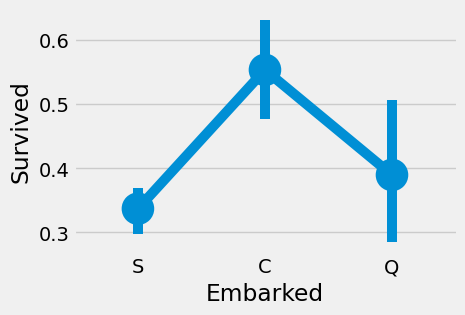

In [27]:
sns.catplot(data=data,x='Embarked',y='Survived',kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

<font color='grey'>Les chances de survie pour le port C sont les plus élevées autour de 0,55 alors qu'elles sont les plus faibles pour le S.</font>

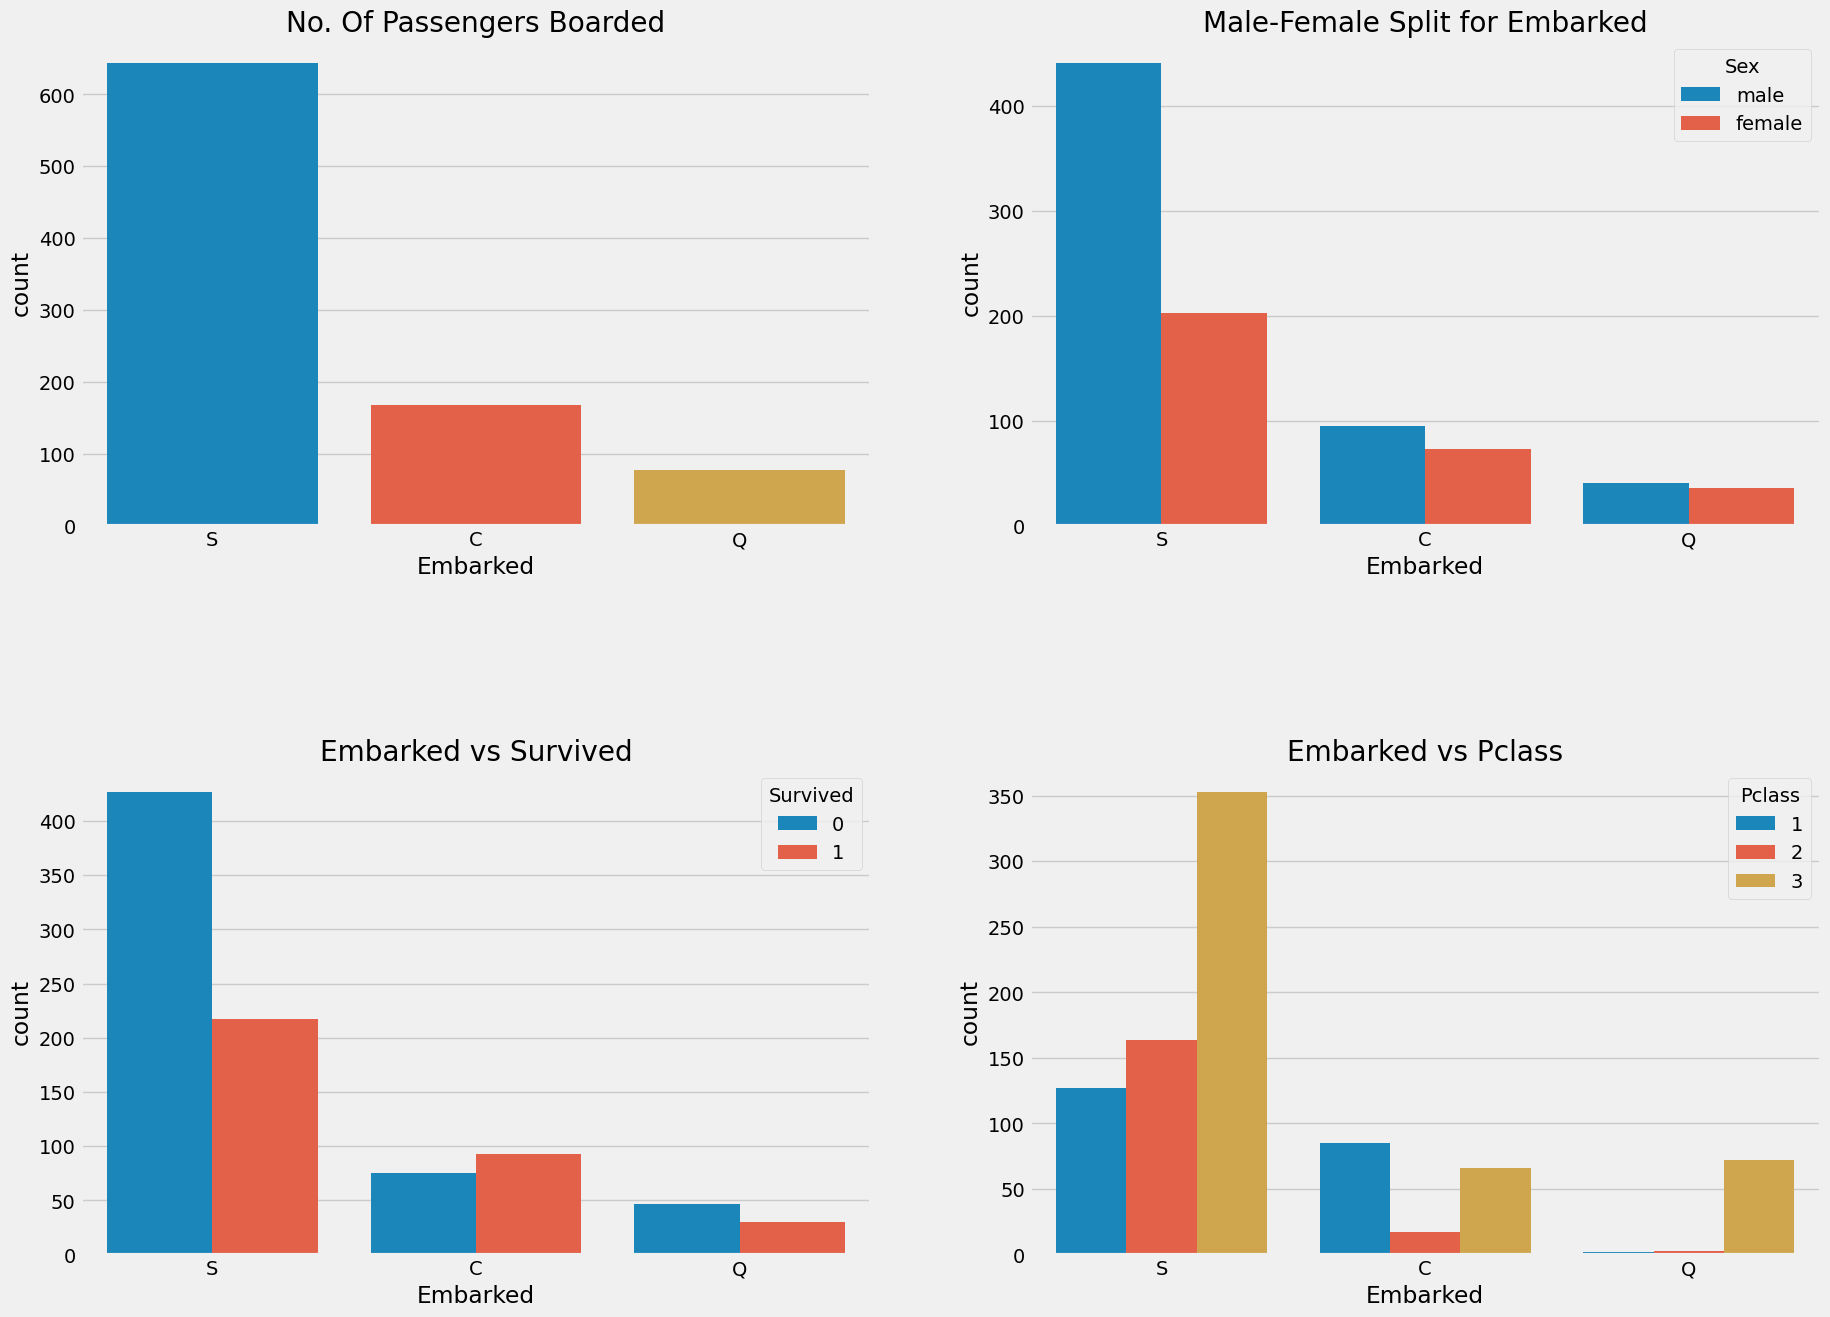

In [28]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(data=data,x='Embarked',ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(data=data,x='Embarked',hue='Sex',ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(data=data,x='Embarked',hue='Survived',ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(data=data,x='Embarked',hue='Pclass',ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### Observations :
1. <font color='grey'>Nombre maximum de passagers embarqués à partir de S. La majorité d'entre eux étant de Pclass3.</font>

2.<font color='grey'> Les passagers de C semblent avoir de la chance car une bonne partie d'entre eux ont survécu. La raison en est peut-être le sauvetage de tous les passagers Pclass1 et Pclass2.</font>

3.<font color='grey'> L'Embark S regarde vers le port d'où la majorité des gens riches ont embarqué. Pourtant, les chances de survie sont faibles ici, c'est parce que de nombreux passagers de Pclass3 autour de **81%** n'ont pas survécu.</font>

4.<font color='grey'> Port Q comptait près de 95 % des passagers de Pclass3.</font>

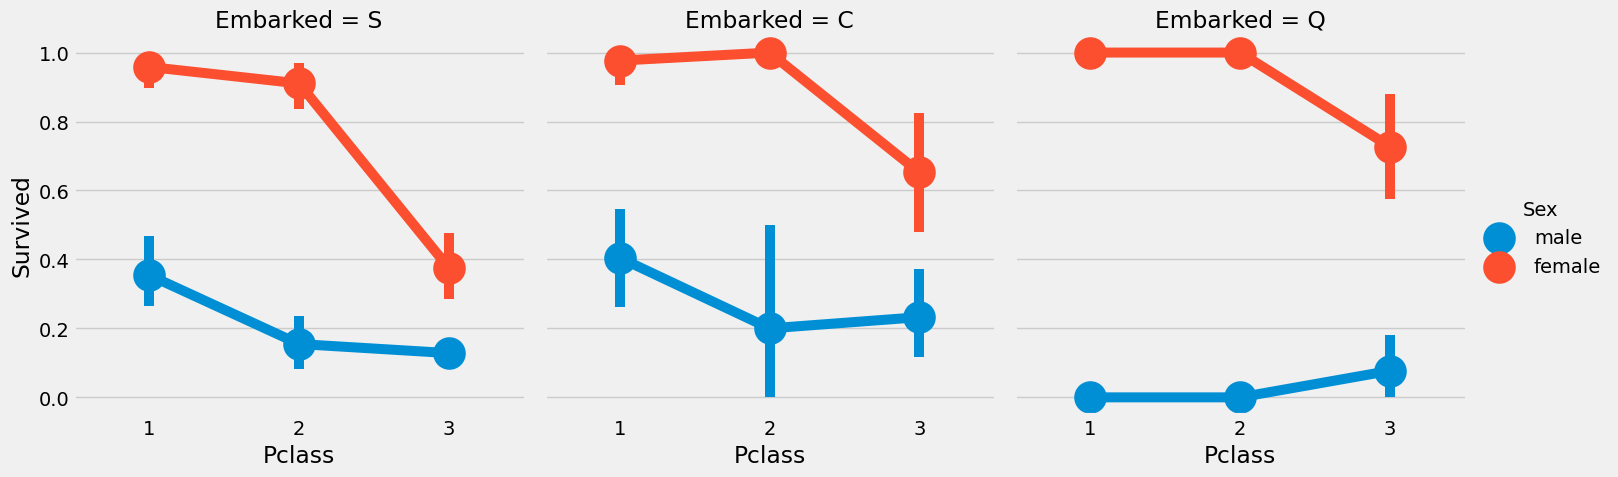

In [30]:
sns.catplot(data=data,x='Pclass',y='Survived',hue='Sex',col='Embarked',kind='point')
plt.show()

Observations :

1.<font color='grey'>Les chances de survie sont presque de 1 pour les femmes pour Pclasse1 et Pclasse2 quelle que soit la Pclasse.</font>

2.<font color='grey'> Port S semble être très malchanceux pour les passagers Pclass3 car le taux de survie des hommes et des femmes est très faible. (Money Matters)</font>

3.<font color='grey'> Le port Q semble être le plus désagréable pour les hommes, car presque tous appartenaient à la classe P 3.</font>

Remplissage embarqué NaN

<font color='grey'>Comme nous avons vu que le nombre maximum de passagers embarquait depuis le port S, nous remplaçons NaN par S.</font>

In [31]:
data['Embarked'].fillna('S',inplace=True)

In [32]:
data.Embarked.isnull().any()

False

## SibSip-->Fonction discrète
<font color='grey'>Cette caractéristique représente: si une personne est seule ou avec les membres de sa famille.

Frère/sœur = frère, sœur, demi-frère, demi-sœur

Conjoint = mari, femme </font>

In [69]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


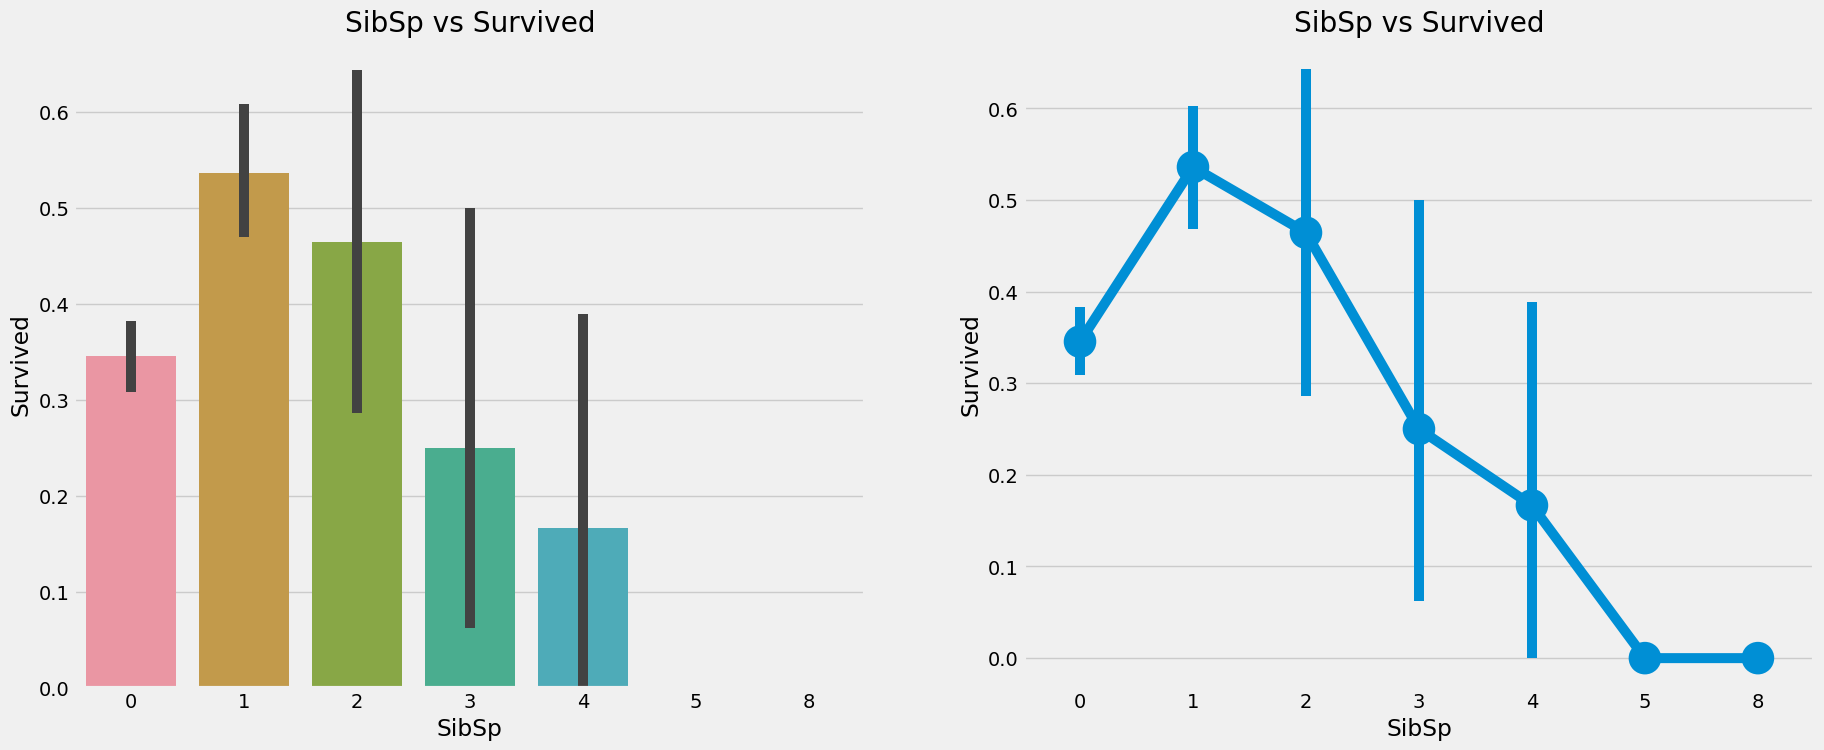

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=data,x='SibSp',y='Survived',ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(data=data,x='SibSp',y='Survived',ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [73]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations :

<font color='grey'>Le barplot et le pointplot montrent que si un passager est seul à bord sans frère ou sœur, il a un taux de survie de 34,5 %. Le graphique diminue approximativement si le nombre de frères et sœurs augmente. C'est logique. Autrement dit, si j'ai une famille à bord, j'essaierai de la sauver au lieu de me sauver d'abord. Étonnamment, la survie des familles de 5 à 8 membres est de 0 %. La raison peut être Pclass ??

La raison est Pclass. Le tableau croisé montre que Person with SibSp>3 étaient tous dans Pclass3. Il est imminent que toutes les familles nombreuses de Pclasse3(>3) meurent.</font>

## Parch

In [74]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


<font color='grey'>Le tableau croisé montre à nouveau que les familles plus nombreuses étaient dans Pclass3.</font>

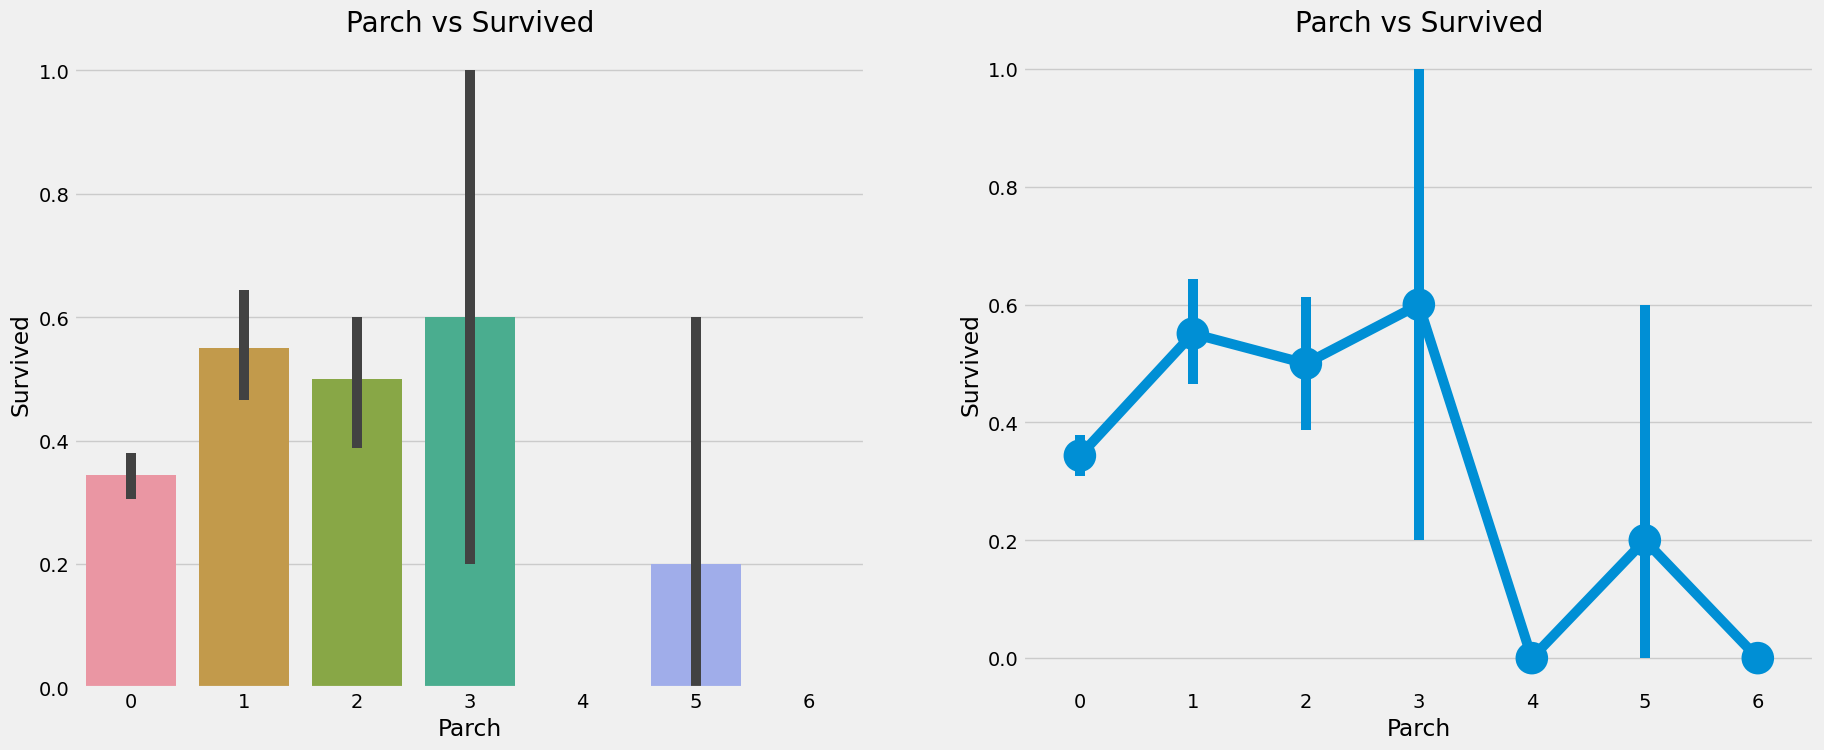

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(data=data,x='Parch',y='Survived',ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(data=data,x='Parch',y='Survived',ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Observations :

<font color='grey'>Ici aussi, les résultats sont assez similaires. Les passagers ayant leurs parents à bord ont plus de chances de survie. Elle diminue cependant au fur et à mesure que le nombre de parents augmente.

Les chances de survie sont bonnes pour quelqu'un qui a de 1 à 3 parents à bord du navire. Le fait d'être seul s'avère également fatal et les chances de survie diminuent lorsqu'une personne a >4 parents à bord du navire.</font>

## Tarif--> Fonction continue

In [78]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


<font color='grey'>Le tarif le plus bas est **0.0**. Wow !! un tour gratuit et luxueux.</font>

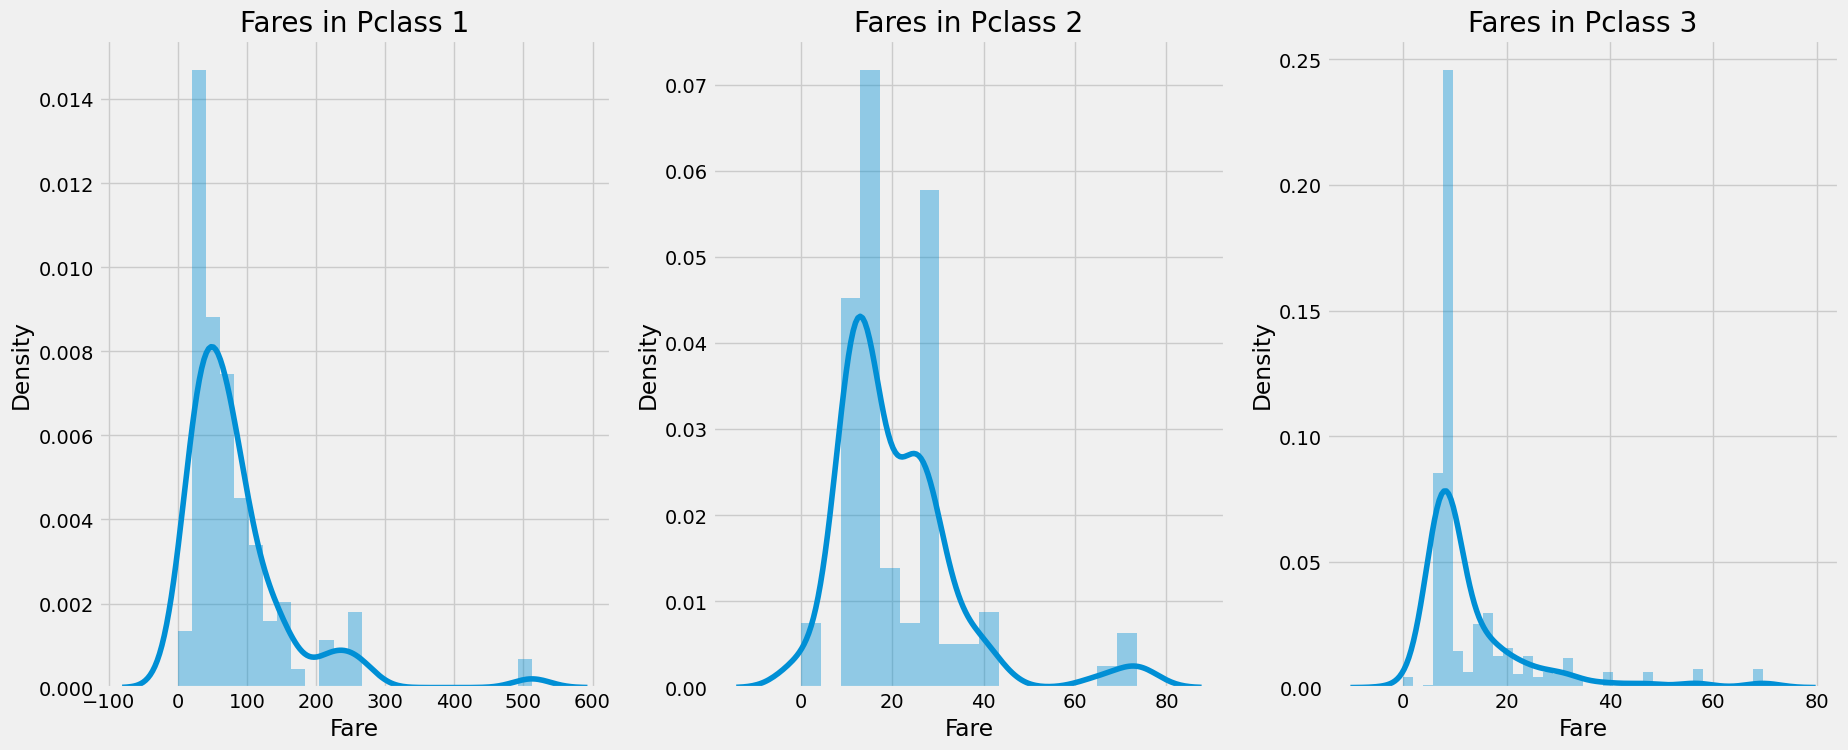

In [79]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

<font color='grey'>Il semble qu'il y ait une grande distribution dans les tarifs des passagers de la classe P1 et cette distribution continue de diminuer au fur et à mesure que les normes diminuent. Comme il s'agit également d'une distribution continue, nous pouvons la convertir en valeurs discrètes en utilisant le binning.</font>

## Observations dans le Nutshell pour toutes les caractéristiques :


``Le sexe`` <font color='grey'>: Les chances de survie des femmes sont plus élevées que celles des hommes.

``Pclass``:Il y a une tendance visible que le fait d'être un passager de 1ère classe donne de meilleures chances de survie. Le taux de survie pour la classe Pclass3 est très faible. Pour les femmes, les chances de survie à partir de la classe 1 sont presque égales à 1 et sont également élevées pour celles de la classe 2. L'argent gagne !

``Âge`` : Les enfants de moins de 5 à 10 ans ont de grandes chances de survie. Les passagers âgés de 15 à 35 ans meurent souvent.

``Embarqué ``: C'est une caractéristique très intéressante. Les chances de survie au C semblent meilleures que celles du S, même si la majorité des passagers de la classe P1 ont embarqué au S. Les passagers du Q étaient tous de la classe P3.

``Parch+SibSp ``: Le fait d'avoir 1 à 2 frères et sœurs, un conjoint à bord ou 1 à 3 parents présente une plus grande probabilité que le fait d'être seul ou d'avoir une famille nombreuse qui voyage avec soi.</font>

## Corrélation entre les caractéristiques

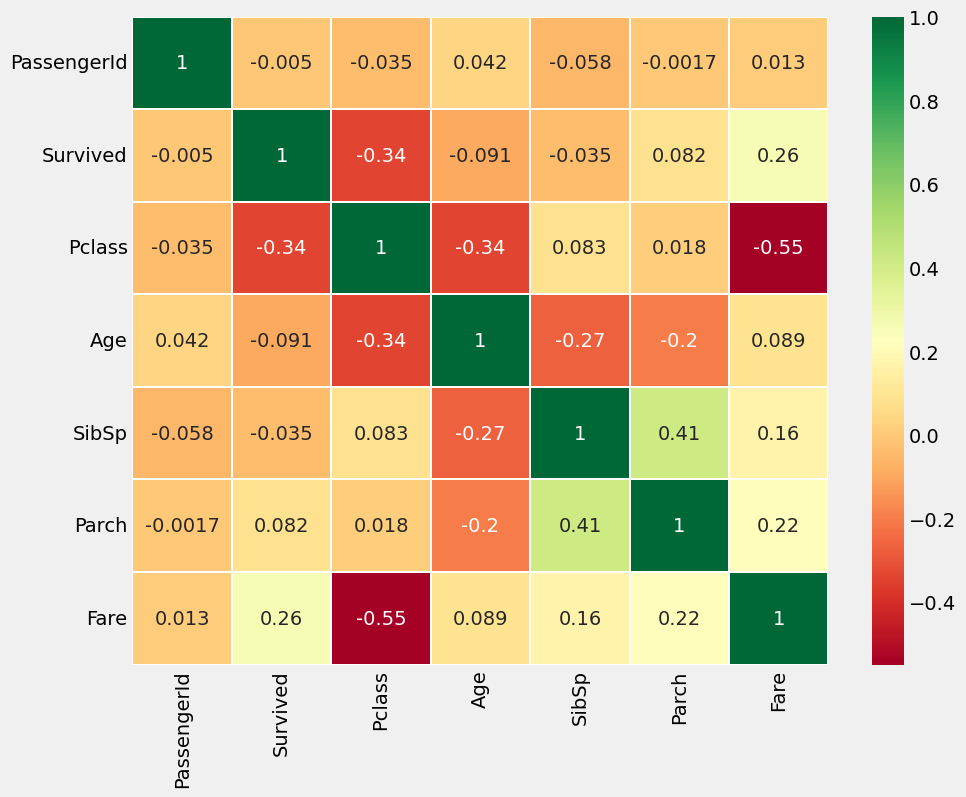

In [80]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interprétation de la carte thermique

<font color='grey'>La première chose à noter est que seules les caractéristiques numériques sont comparées car il est évident que nous ne pouvons pas établir de corrélation entre les alphabets ou les chaînes de caractères. Avant de comprendre le graphique, voyons ce qu'est exactement la corrélation.</font>

CORRÉLATION POSITIVE : <font color='grey'>Si une augmentation de la caractéristique A entraîne une augmentation de la caractéristique B, alors elles sont positivement corrélées. Une valeur de 1 signifie une corrélation positive parfaite.</font>

CORRÉLATION NÉGATIVE : <font color='grey'>Si une augmentation de la caractéristique A entraîne une diminution de la caractéristique B, alors elles sont corrélées négativement. Une valeur de -1 signifie une corrélation négative parfaite.</font>

<font color='grey'>Disons maintenant que deux caractéristiques sont fortement ou parfaitement corrélées, de sorte que l'augmentation de l'une entraîne l'augmentation de l'autre. Cela signifie que les deux caractéristiques contiennent des informations très similaires et qu'il y a très peu ou pas de variance dans les informations. C'est ce qu'on appelle la ``multicolinéarité``, car les deux caractéristiques contiennent presque les mêmes informations.

Pensez-vous que nous devrions les utiliser toutes les deux car ``l'une d'entre elles est redondante``. Lorsque nous créons ou formons des modèles, nous devrions essayer d'éliminer les caractéristiques redondantes, car cela réduit le temps de formation et présente de nombreux autres avantages.

Maintenant, à partir de la carte thermique ci-dessus, nous pouvons voir que les caractéristiques ne sont pas beaucoup corrélées. La corrélation la plus élevée est entre ``SibSp et Parch, soit 0,41``. Nous pouvons donc continuer avec toutes les caractéristiques.</font>


## Part2 :Ingénierie des fonctionnalités et nettoyage des données

Qu'est-ce que l'ingénierie des caractéristiques ?

<font color='grey'>Lorsqu'on nous donne un ensemble de données avec des caractéristiques, il n'est pas nécessaire que toutes les caractéristiques soient importantes. Il peut y avoir de nombreuses caractéristiques redondantes qui doivent être éliminées. Nous pouvons également obtenir ou ajouter de nouvelles caractéristiques en observant ou en extrayant des informations d'autres caractéristiques.

Par exemple, on peut obtenir la caractéristique Initial en utilisant la caractéristique Nom. Voyons si nous pouvons obtenir de nouvelles caractéristiques et en éliminer quelques-unes. Nous allons également transformer les caractéristiques pertinentes existantes en une forme appropriée pour la modélisation prédictive.</font>

## Tranche d'âge

#### Problème avec la caractéristique âge :
<font color='grey'>Comme j'ai mentionné précédemment que ``l'âge est une caractéristique continue``, il y a un problème avec les variables continues dans les modèles d'apprentissage automatique.

``Exemple:``Si je dis de regrouper ou d'organiser les sportifs par ``sexe``, nous pouvons facilement les séparer en hommes et femmes.

Maintenant, si je dis de les regrouper par leur ``Age``, alors comment allez-vous faire ? S'il y a 30 personnes, il peut y avoir 30 valeurs d'âge. Maintenant, c'est un problème.

Nous devons convertir ces ``valeurs continues en valeurs catégorielles`` par binning Je vais utiliser le binning, c'est-à-dire regrouper une gamme d'âges dans une seule catégorie ou leur attribuer une seule valeur.

Bon, l'âge maximum d'un passager est de 80 ans. Divisons donc la plage de 0 à 80 ans en 5 cases. Donc 80/5=16.
Donc des cases de taille 16.</font>

In [42]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [82]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


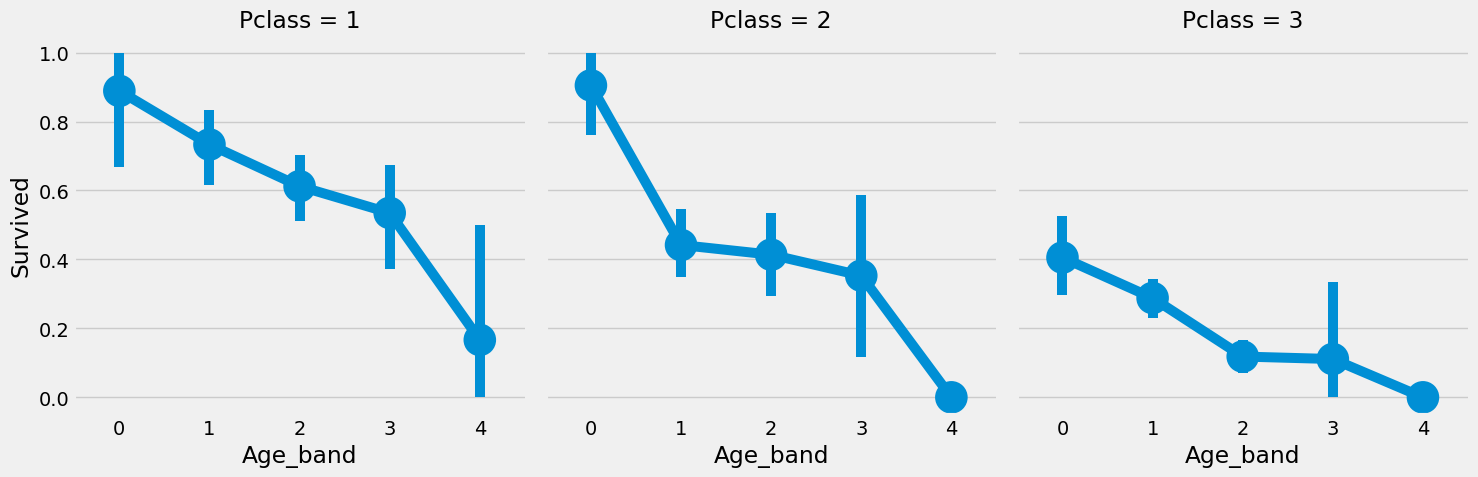

In [43]:
sns.catplot(data=data,x='Age_band',y='Survived',col='Pclass',kind='point')
plt.show()

<font color='grey'>C'est vrai...le taux de survie diminue avec l'âge indépendamment de la classe P.</font>

## Taille_de_la_famille et Seul

<font color='grey'>À ce stade, nous pouvons créer une nouvelle caractéristique appelée "Family_size" et "Alone" et l'analyser. Cette caractéristique est la somme de Parch et SibSp. Elle nous fournit des données combinées qui nous permettent de vérifier si le taux de survie a un rapport avec la taille de la famille des passagers. Alone indique si un passager est seul ou non.</font>

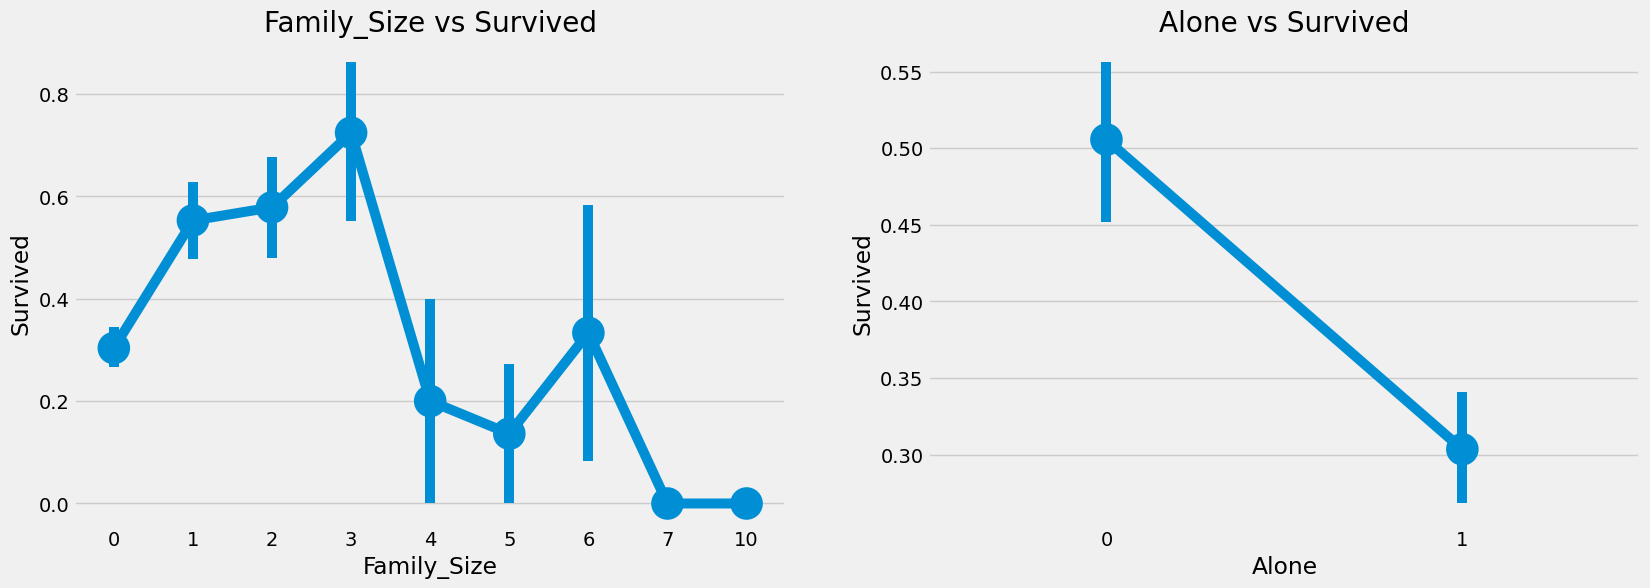

In [44]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(data=data,x='Family_Size',y='Survived',ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(data=data,x='Alone',y='Survived',ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0<font color='grey'> signifie que le passager est seul. En clair, si vous êtes seul ou si la taille de la famille est égale à 0, les chances de survie sont très faibles. Pour une taille de famille > 4, les chances diminuent également. Cela semble également être une caractéristique importante pour le modèle. Examinons cela plus en détail.</font>

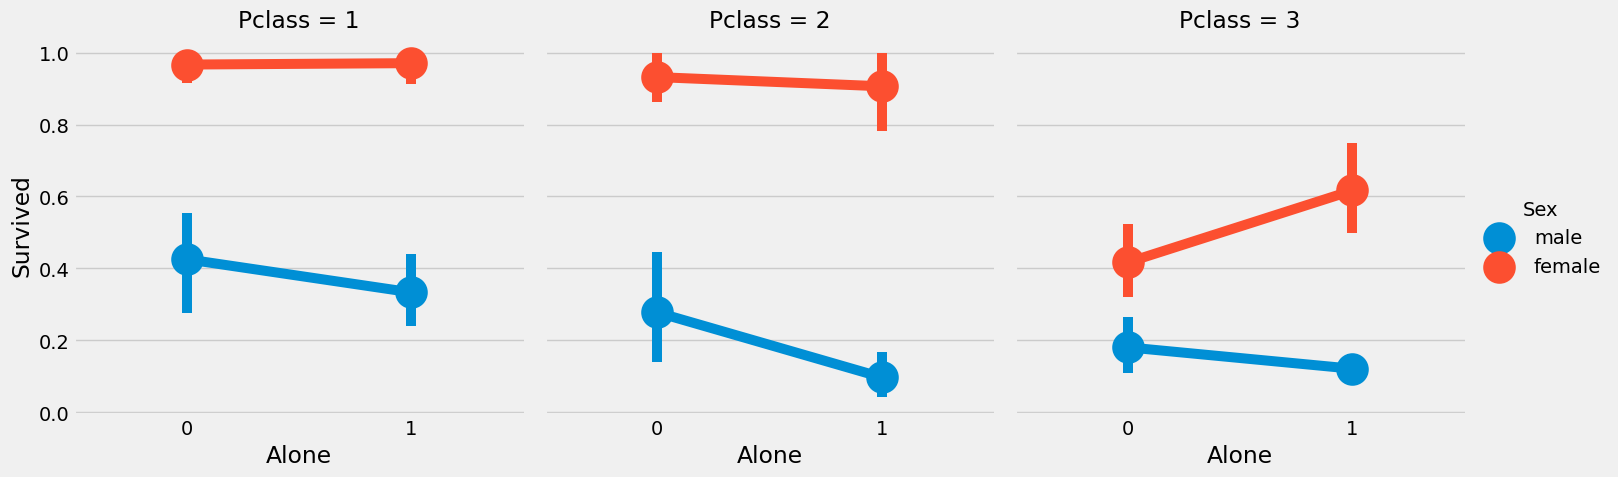

In [46]:
sns.catplot(data=data,x='Alone',y='Survived',hue='Sex',col='Pclass',kind='point')
plt.show()

<font color='grey'>Il est évident que le fait d'être seul est néfaste, quel que soit le sexe ou la classe sociale, à l'exception de la classe sociale 3 où les femmes seules ont plus de chances que celles qui ont une famille.</font>

## Fare_Range(Gamme tarifaire)

<font color='grey'>Puisque le tarif est également une caractéristique continue, nous devons le convertir en valeur ordinale. Pour cela, nous allons utiliser **pandas.qcut**.

Ce que ``qcut`` fait, c'est qu'il divise ou arrange les valeurs selon le nombre de cases que nous avons passées. Ainsi, si nous passons pour 5 bacs, il arrangera les valeurs de manière égale dans 5 bacs ou plages de valeurs distinctes.</font>

In [94]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


<font color='grey'>Comme nous l'avons vu ci-dessus, nous pouvons clairement voir que ``plus la plage tarifaire augmente, plus les chances de survie augmentent.``

Maintenant, nous ne pouvons pas passer les valeurs de Fare_Range telles quelles. Nous devons les convertir en valeurs singleton comme nous l'avons fait dans ``Age_Band``.</font>

In [52]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

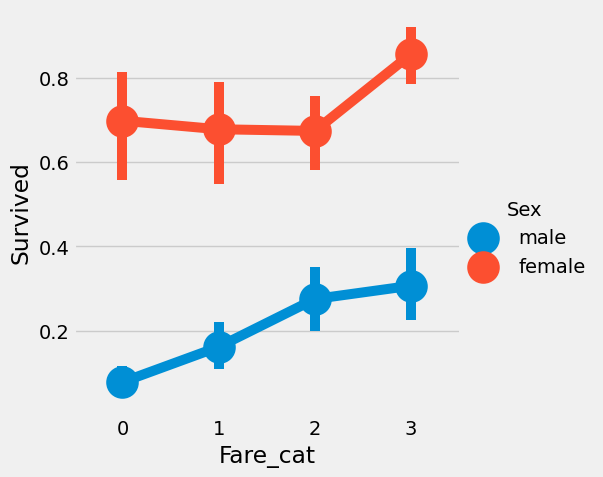

In [54]:
sns.catplot(data=data,x='Fare_cat',y='Survived',hue='Sex',kind='point')
plt.show()

<font color='grey'>Il est clair que plus le Fare_cat augmente, plus les chances de survie augmentent. Cette caractéristique peut devenir une caractéristique importante pendant la modélisation avec le sexe.</font>

## Convertir des valeurs de chaîne en valeurs numériques

<font color='grey'>Puisque nous ne pouvons pas transmettre des chaînes de caractères à un modèle d'apprentissage automatique, nous devons convertir des caractéristiques telles que le sexe, l'embarquement, etc. en valeurs numériques.</font>

In [55]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Abandon des fonctionnalités inutiles

``Name``<font color='grey'>--> Nous n'avons pas besoin de la caractéristique name car elle ne peut être convertie en aucune valeur catégorielle.

``Age``--> Nous avons la fonction Age_band, donc pas besoin de celle-ci.

``Ticket``--> C'est une chaîne aléatoire qui ne peut pas être catégorisée.

``Fare``--> Nous avons la fonction Fare_cat, donc inutile.

``Cabine``--> Beaucoup de valeurs NaN et aussi beaucoup de passagers ont plusieurs cabines. C'est donc une fonctionnalité inutile.

``Fare_Range``--> Nous avons la fonctionnalité fare_cat.

``PassengerId``--> Ne peut pas être catégorisé.</font>

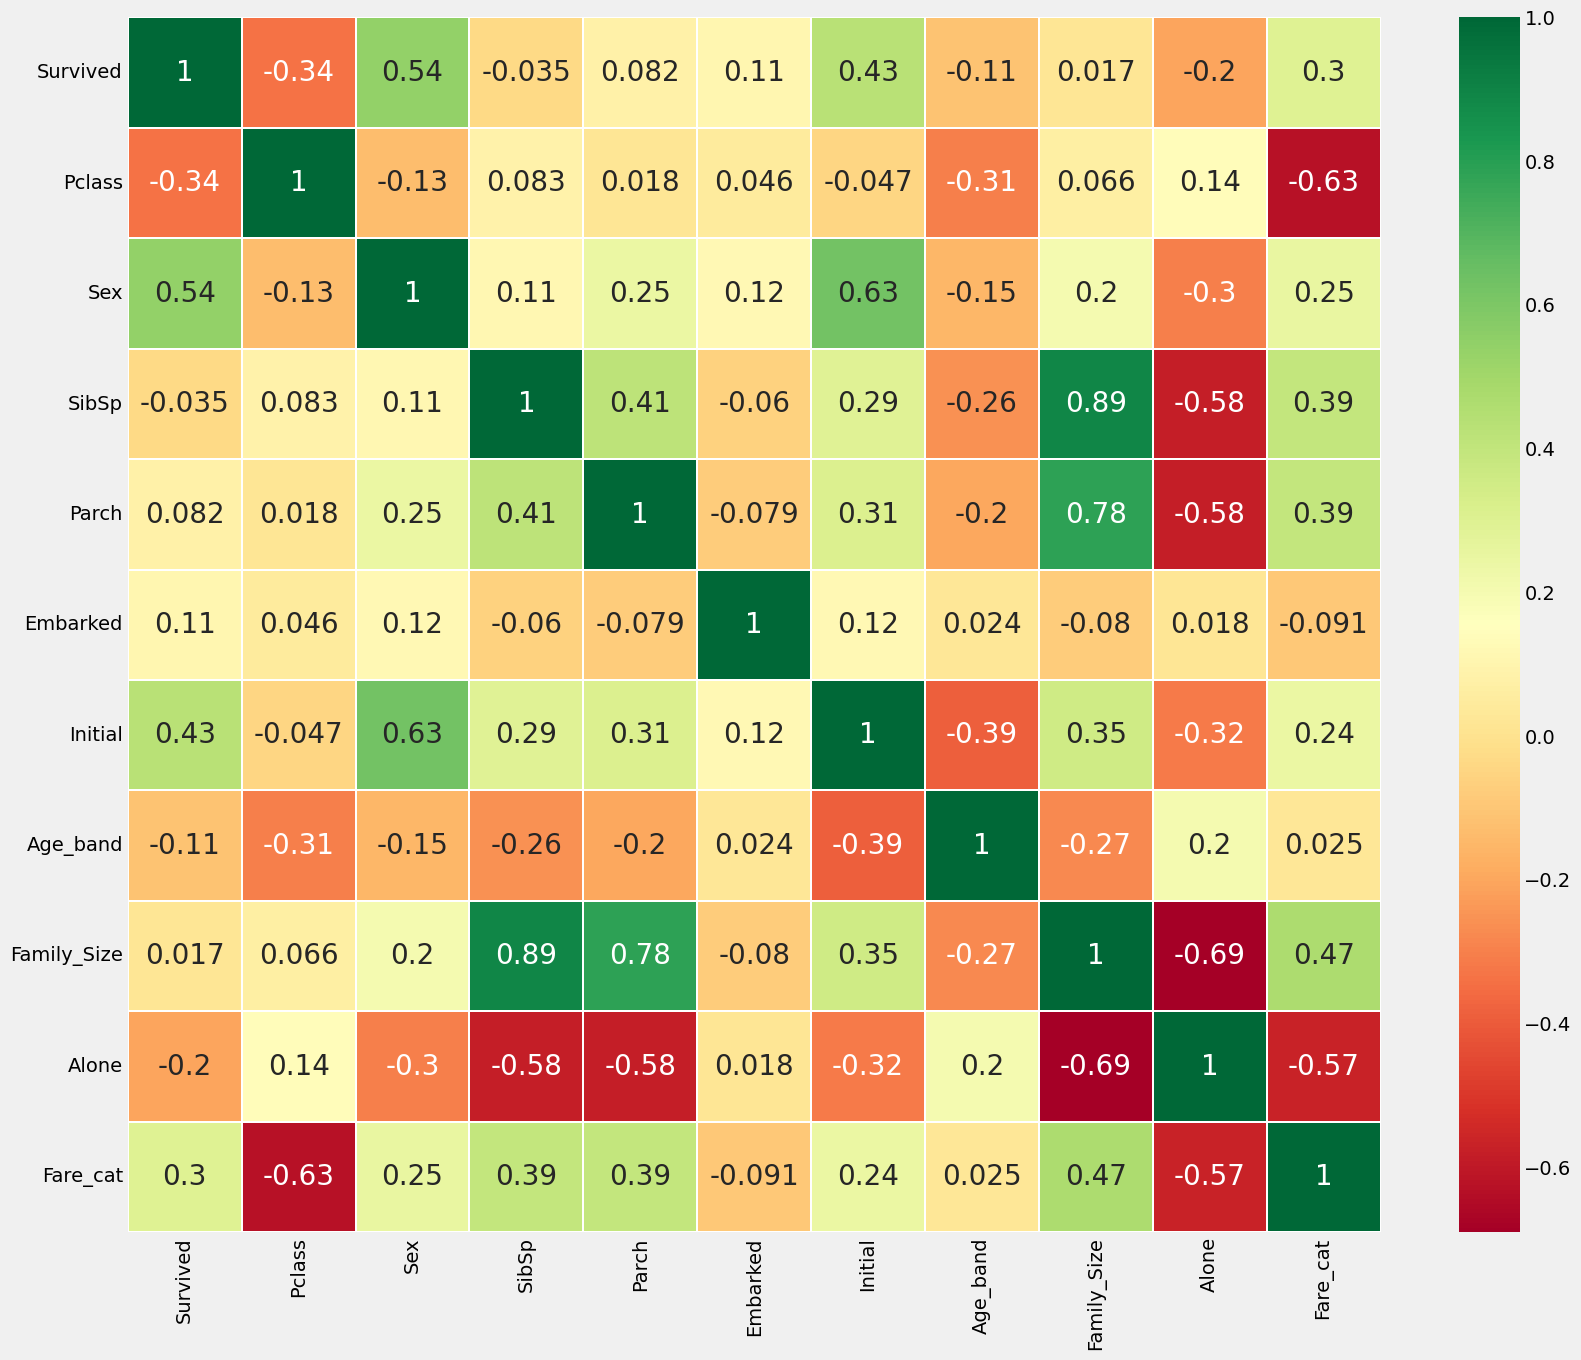

In [98]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<font color='grey'>Now the above correlation plot, we can see some positively related features. Some of them being ``SibSp andd Family_Size`` and ``Parch and Family_Size`` and some negative ones like ``Alone and Family_Size.``</font>

In [65]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [66]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [67]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y,)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

ValueError: could not convert string to float: 'Larsson, Mr. Bengt Edvin'

In [71]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

ValueError: could not convert string to float: 'Larsson, Mr. Bengt Edvin'

In [72]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

ValueError: could not convert string to float: 'Larsson, Mr. Bengt Edvin'

In [73]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

ValueError: could not convert string to float: 'Larsson, Mr. Bengt Edvin'

In [105]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


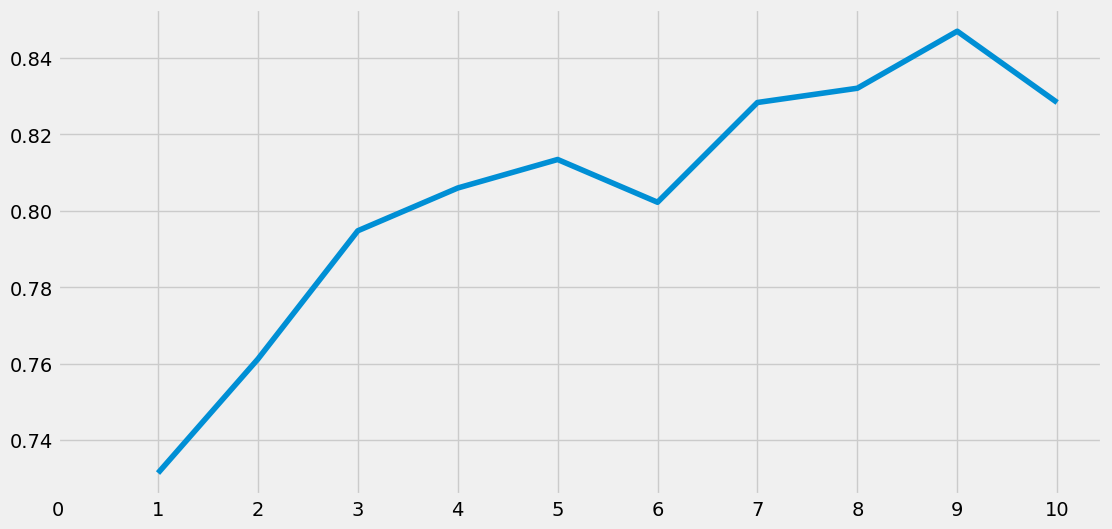

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [106]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [107]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [108]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


In [110]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10,shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805868,0.044513
Naive Bayes,0.795843,0.054861
Random Forest,0.814856,0.047270


<AxesSubplot: >

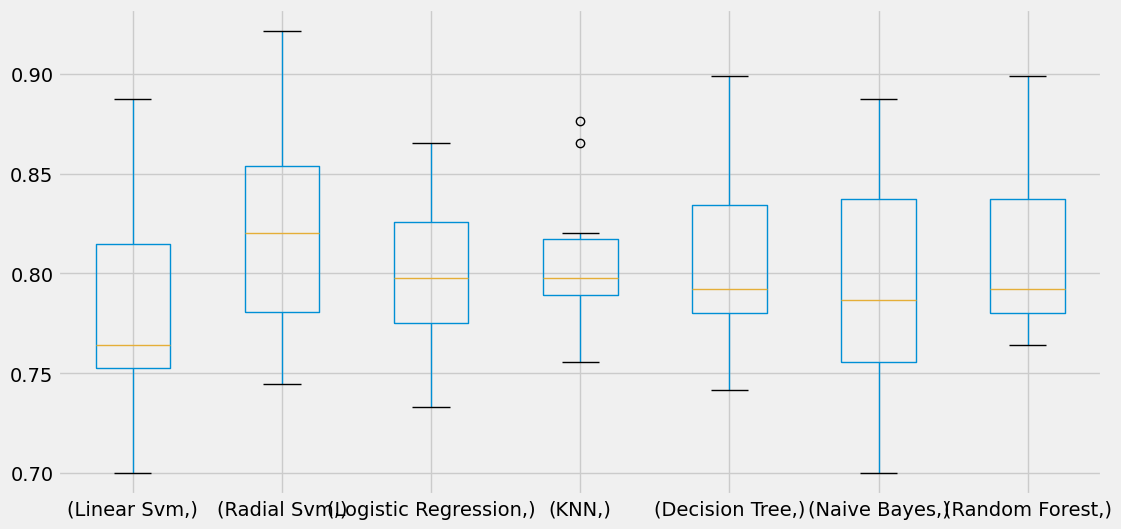

In [111]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

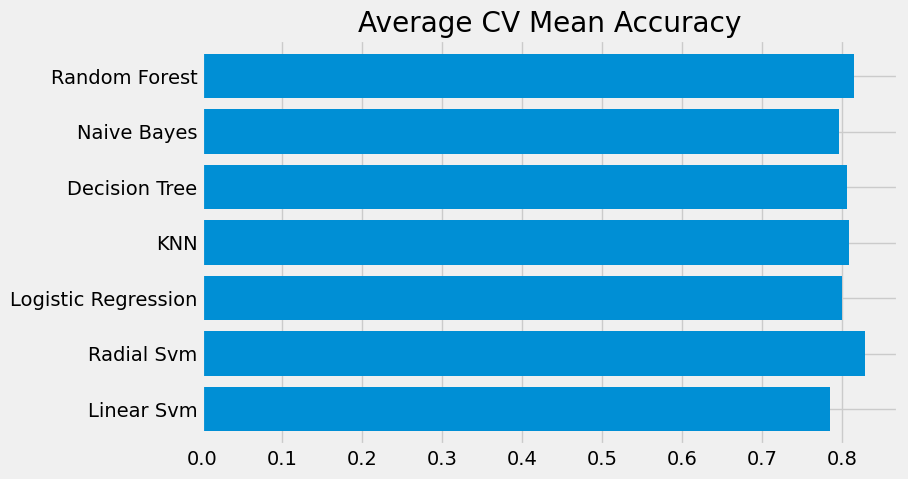

In [112]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

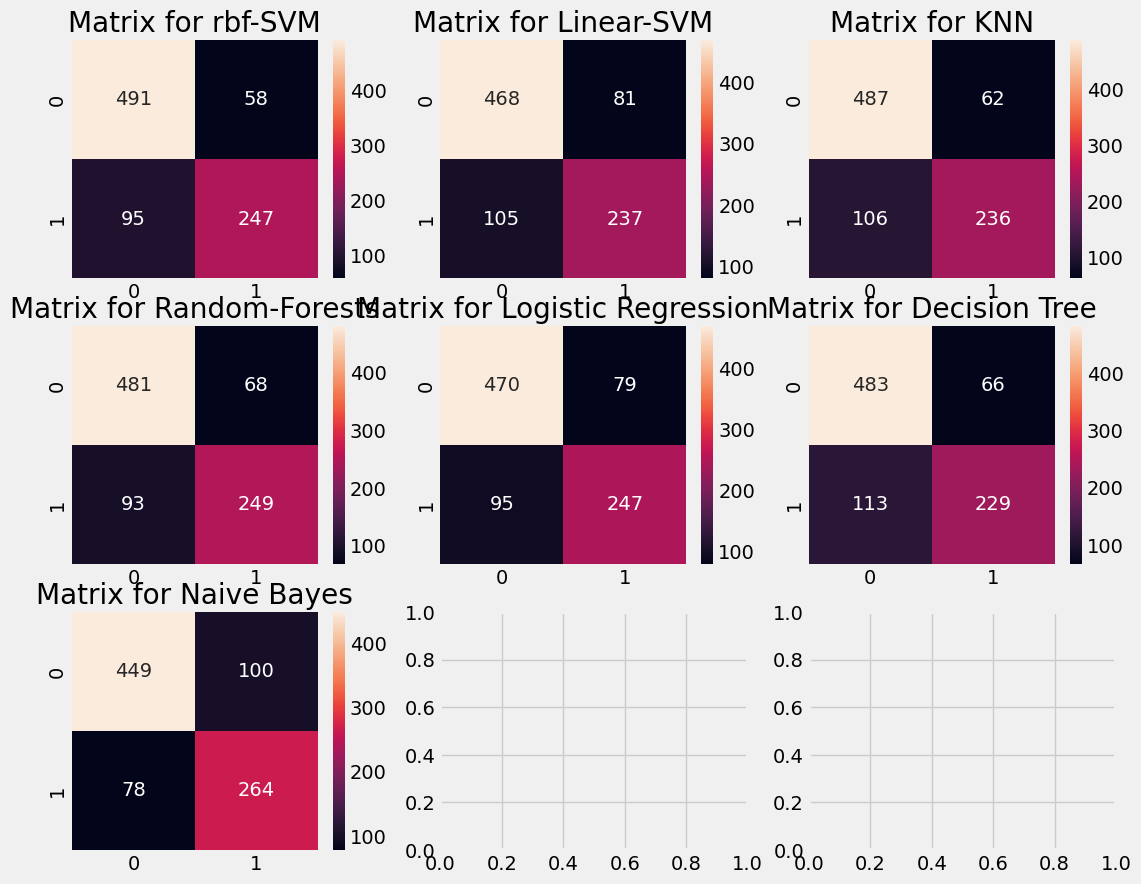

In [113]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

In [114]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [115]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


In [116]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


In [117]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [118]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [119]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [122]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


In [123]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


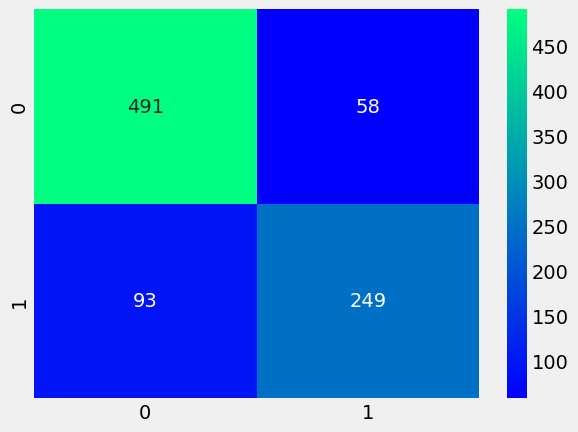

In [124]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

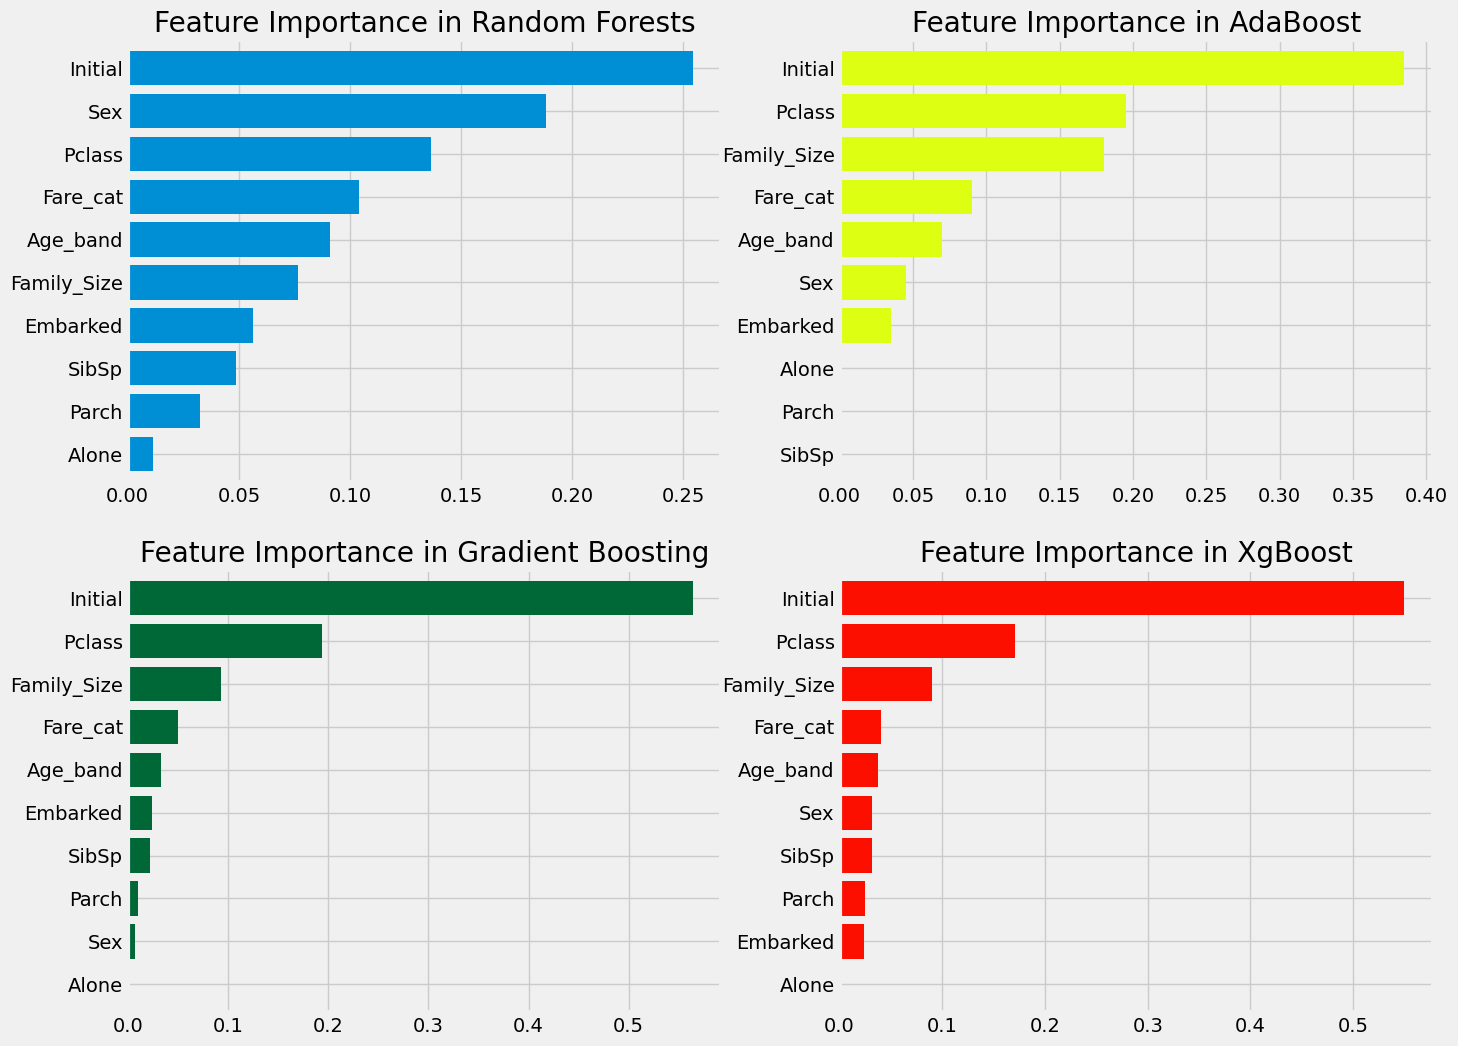

In [125]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()